In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images , train_labels), (test_images, test_labels) = mnist.load_data()

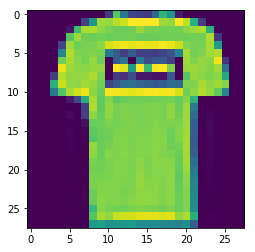

In [4]:
plt.imshow(train_images[1])

In [5]:
train_images=train_images.reshape(60000,28,28,1)
train_images = train_images/255.0
test_images=test_images.reshape(10000,28,28,1)
test_images= test_images/255.0

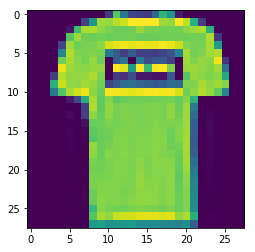

In [6]:
plt.imshow(train_images[1,:,:,0])

Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64 , (3,3) , activation='relu' , input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64 , (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(10 , activation= 'softmax')
])

In [8]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [9]:
def evaluate(model):
    history = model.fit(train_images , train_labels , epochs=5 , validation_split=0.1)
    loss , accuracy= model.evaluate(test_images , test_labels)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 77s 1ms/sample - loss: 0.4544 - accuracy: 0.8343 - val_loss: 0.3220 - val_accuracy: 0.8817
Epoch 2/5
54000/54000 [==============================] - 73s 1ms/sample - loss: 0.3033 - accuracy: 0.8897 - val_loss: 0.2874 - val_accuracy: 0.8935
Epoch 3/5
54000/54000 [==============================] - 77s 1ms/sample - loss: 0.2563 - accuracy: 0.9050 - val_loss: 0.2910 - val_accuracy: 0.8977
Epoch 4/5
54000/54000 [==============================] - 76s 1ms/sample - loss: 0.2237 - accuracy: 0.9169 - val_loss: 0.2462 - val_accuracy: 0.9095
Epoch 5/5
54000/54000 [==============================] - 78s 1ms/sample - loss: 0.1942 - accuracy: 0.9269 - val_loss: 0.2672 - val_accuracy: 0.9058
10000/1 [==========================================================================================================================================================================================================

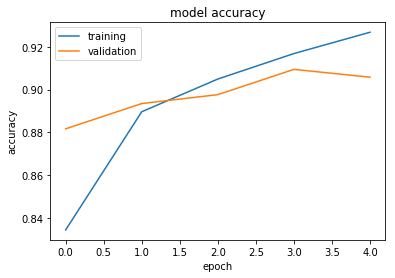

In [10]:
evaluate(model)

1
[3.9848574e-06 9.9999332e-01 9.5346913e-08 1.9358122e-08 6.8690900e-11
 1.9774182e-08 3.0978473e-08 1.0573157e-12 2.6781679e-06 2.0619410e-10]


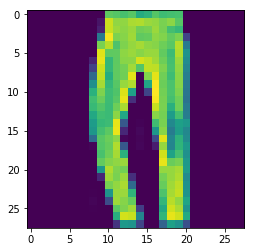

In [22]:

print(test_labels[5])
predictions=model.predict(test_images)
print(predictions[5])
plt.imshow(test_images[5,:,:,0])


In [23]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


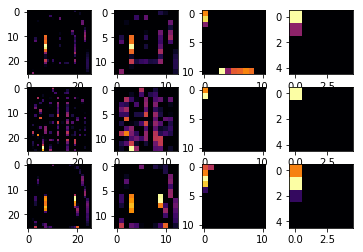

In [24]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=10
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 62
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER ], cmap='inferno')
  axarr[2,x].grid(False)